<!--announcements-->
<blockquote>
    <center>
    <img src="yinyang.png" width="400px" /></a>
    </center>
      <p><cite><center>"Just as we have two eyes and two feet,<br>
      duality is part of life."<br>
<b>--Carlos Santana</b><br>
      </center></cite></p>
</blockquote>


<h3>Introduction</h3>
In this project, you will implement a linear support vector machine. To start, we will generate a linear separable dataset and visualize it.

In [2]:
import numpy as np
from numpy.matlib import repmat
import sys
import time

import helper as h

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import linregress

import pylab
from matplotlib.animation import FuncAnimation

%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


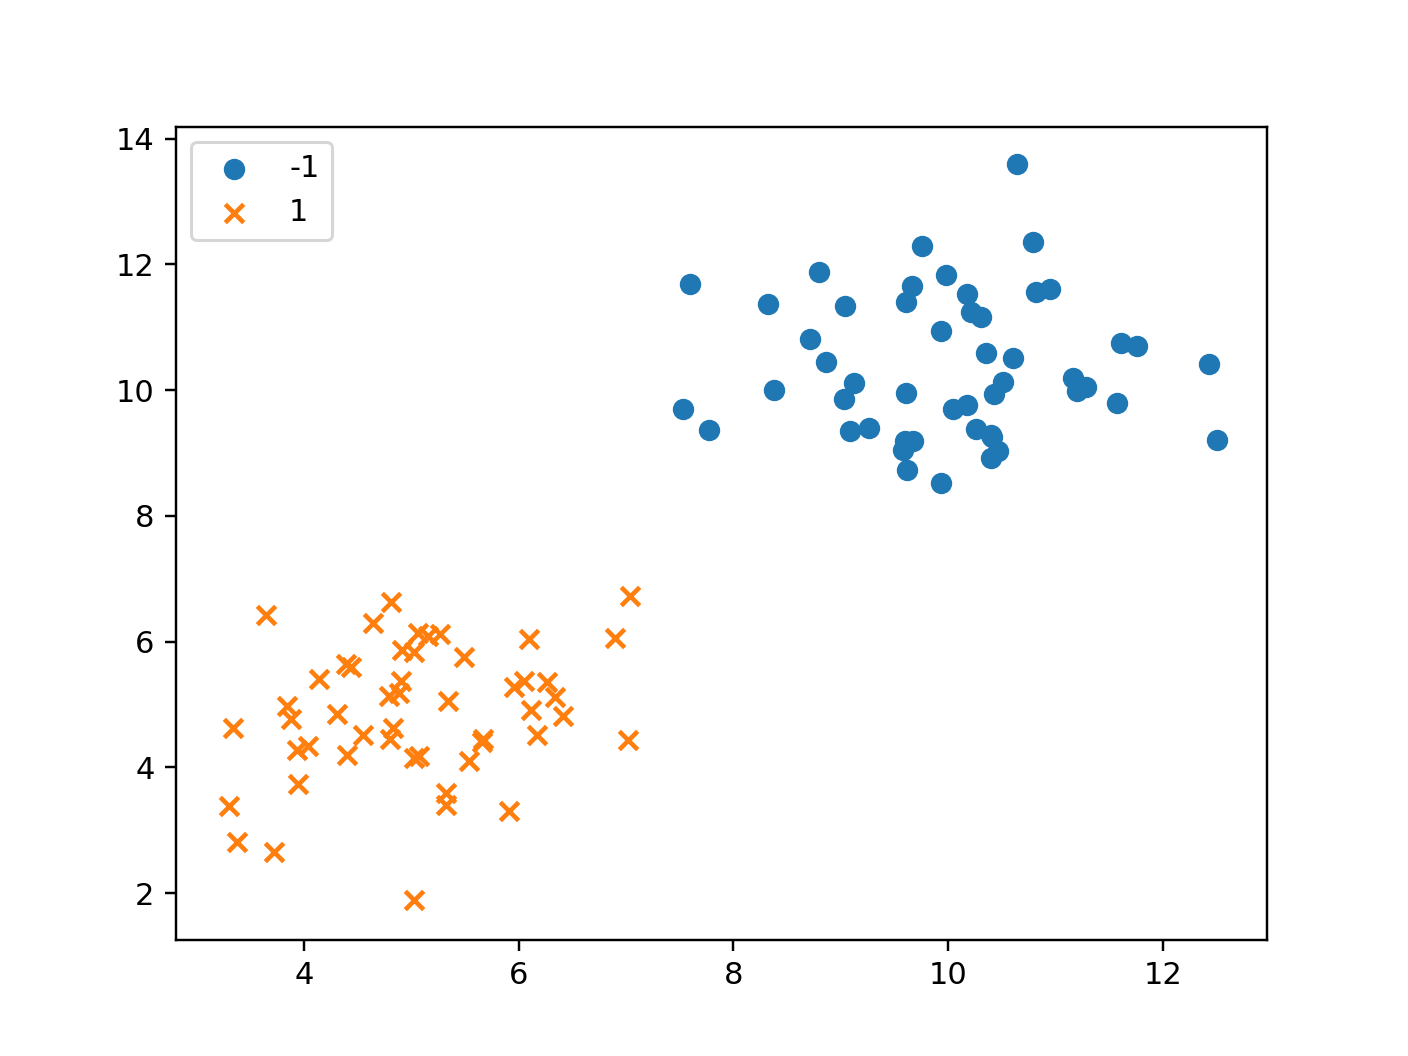

In [3]:
xTr, yTr = h.generate_data()
h.visualize_2D(xTr, yTr)

Recall that the unconstrained loss function for linear SVM is 
    
$$
\begin{aligned}
\min_{\mathbf{w},b}\underbrace{\mathbf{w}^T\mathbf{w}}_{l_{2} \text{ regularizer}}  +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\mathbf{w}^T \mathbf{x}_i+b),0 \right ]}_{\text{hinge loss}}
\end{aligned}
$$

However, the hinge loss is not differentiable when $1-y_{i}(\mathbf{w}^T \mathbf{x}_i+b)= 0$. So, we are going to use the squared hinge loss instead: 

$$
\begin{aligned}
\min_{\mathbf{w},b}\underbrace{\mathbf{w}^T\mathbf{w}}_{l_{2} \text{ regularizer}} +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\mathbf{w}^T \mathbf{x}_i+b),0 \right ] ^2}_{\text{squared hinge loss}}
\end{aligned}
$$

You will need to implement the function <code>loss</code>, which takes in training data <code>xTr</code> ($n\times d$) and labels <code>yTr</code> ($n$) with <code>yTr[i]</code>$\in \{-1,1\}$ and evaluates the loss of classifier $(\mathbf{w},b)$. In addition, you need to implement <code>grad</code>, which takes in the same arguments but returns gradient of the loss function with respect to $(\mathbf{w},b)$. 

In [36]:
def loss(w, b, xTr, yTr, C):
    """
    INPUT:
    w     : d   dimensional weight vector
    b     : scalar (bias)
    xTr   : nxd dimensional matrix (each row is an input vector)
    yTr   : n   dimensional vector (each entry is a label)
    C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
    
    OUTPUTS:
    loss     : the total loss obtained with (w, b) on xTr and yTr (scalar)
    """
    
    loss_val = 0.0
    
    ### BEGIN SOLUTION
    margin = yTr*(xTr @ w + b)
    loss_val = w.T @ w + C*(np.sum(np.maximum(1 - margin, 0) ** 2))
    ### END SOLUTION
    
    return loss_val

In [37]:
# These tests test whether your loss() is implemented correctly

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

# Check whether your loss() returns a scalar
def loss_test1():
    w = np.zeros(d)
    b = np.zeros(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    
    return np.isscalar(loss_val)

# Check whether your loss() returns a nonnegative scalar
def loss_test2():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    
    return loss_val >= 0

# Check whether you implement l2-regularizer correctly
def loss_test3():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 0)
    loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 0)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test4():
    w = np.zeros(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 10)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test5():
    w = np.zeros(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 10)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly
def loss_test6():
    w = np.zeros(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 100)
    loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 100)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

h.runtest(loss_test1,'loss_test1')
h.runtest(loss_test2,'loss_test2')
h.runtest(loss_test3,'loss_test3')
h.runtest(loss_test4,'loss_test4')
h.runtest(loss_test5,'loss_test5')
h.runtest(loss_test6,'loss_test6')

Running Test: loss_test1 ... ✔ Passed!
Running Test: loss_test2 ... ✔ Passed!
Running Test: loss_test3 ... ✔ Passed!
Running Test: loss_test4 ... ✔ Passed!
Running Test: loss_test5 ... ✔ Passed!
Running Test: loss_test6 ... ✔ Passed!


In [38]:
# Autograder test cell - worth 1 point
# runs loss_test1
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.zeros(d)
b = np.zeros(1)
loss_val = loss(w, b, xTr_test, yTr_test, 10)
    
assert np.isscalar(loss_val)
### END HIDDEN TESTS

In [39]:
# Autograder test cell - worth 1 point
# runs loss test2
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.random.rand(d)
b = np.random.rand(1)
loss_val = loss(w, b, xTr_test, yTr_test, 10)
    
assert loss_val >= 0
### END HIDDEN TESTS

In [40]:
# Autograder test cell - worth 1 point
# runs loss test3
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.random.rand(d)
b = np.random.rand(1)
loss_val = loss(w, b, xTr_test, yTr_test, 0)
loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 0)
    
assert (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)
### END HIDDEN TESTS

In [41]:
# Autograder test cell - worth 1 point
# runs loss test4
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.zeros(d)
b = np.random.rand(1)
loss_val = loss(w, b, xTr_test, yTr_test, 10)
loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 10)

assert (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

### END HIDDEN TESTS

In [42]:
# Autograder test cell - worth 1 point
# runs loss test5
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.zeros(d)
b = np.random.rand(1)
loss_val = loss(w, b, xTr_test, yTr_test, 10)
loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 10)

assert (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)
### END HIDDEN TESTS

In [43]:
# Autograder test cell - worth 1 point
# runs loss test6
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.zeros(d)
b = np.random.rand(1)
loss_val = loss(w, b, xTr_test, yTr_test, 100)
loss_val_grader = h.loss_grader(w, b, xTr_test, yTr_test, 100)
    
assert (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

### END HIDDEN TESTS

Now, we'll implement <code>grad</code>, which takes in the same arguments but returns gradient of the loss function with respect to $(\mathbf{w},b)$. 

In [44]:
def grad(w, b, xTr, yTr, C):
    """
    INPUT:
    w     : d   dimensional weight vector
    b     : scalar (bias)
    xTr   : nxd dimensional matrix (each row is an input vector)
    yTr   : n   dimensional vector (each entry is a label)
    C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)
    
    OUTPUTS:
    wgrad :  d dimensional vector (the gradient of the hinge loss with respect to the weight, w)
    bgrad :  constant (the gradient of he hinge loss with respect to the bias, b)
    """
    n, d = xTr.shape
    
    wgrad = np.zeros(d)
    bgrad = np.zeros(1)
    
    ### BEGIN SOLUTION
    margin = yTr*(xTr @ w + b)
    
    hinge = np.maximum(1 - margin, 0)
    
    indicator = (1 - margin > 0).astype(int)
    wgrad = 2 * w + C * np.sum((2 * hinge * indicator * -yTr).reshape(-1, 1) * xTr, axis=0)
    bgrad = C * np.sum(2 * hinge * indicator * -yTr, axis=0)
    
    ### END SOLUTION
    return wgrad, bgrad

In [45]:
# These tests test whether your grad() is implemented correctly

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

# Checks whether grad returns a tuple
def grad_test1():
    w = np.random.rand(d)
    b = np.random.rand(1)
    out = grad(w, b, xTr_test, yTr_test, 10)
    return len(out) == 2

# Checks the dimension of gradients
def grad_test2():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
    return len(wgrad) == d and np.isscalar(bgrad)

# Checks the gradient of the l2 regularizer
def grad_test3():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 0)
    wgrad_grader, bgrad_grader = h.grad_grader(w, b, xTr_test, yTr_test, 0)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the square hinge loss
def grad_test4():
    w = np.zeros(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 1)
    wgrad_grader, bgrad_grader = h.grad_grader(w, b, xTr_test, yTr_test, 1)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the loss
def grad_test5():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
    wgrad_grader, bgrad_grader = h.grad_grader(w, b, xTr_test, yTr_test, 10)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

h.runtest(grad_test1, 'grad_test1')
h.runtest(grad_test2, 'grad_test2')
h.runtest(grad_test3, 'grad_test3')
h.runtest(grad_test4, 'grad_test4')
h.runtest(grad_test5, 'grad_test5')

Running Test: grad_test1 ... ✔ Passed!
Running Test: grad_test2 ... ✔ Passed!
Running Test: grad_test3 ... ✔ Passed!
Running Test: grad_test4 ... ✔ Passed!
Running Test: grad_test5 ... ✔ Passed!


In [46]:
# Autograder test cell - worth 1 point
# runs grad test1
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

w = np.random.rand(d)
b = np.random.rand(1)
out = grad(w, b, xTr_test, yTr_test, 10)
assert len(out) == 2

### END HIDDEN TESTS

In [47]:
# Autograder test cell - worth 1 point
# runs grad test2
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

# Checks the dimension of gradients
w = np.random.rand(d)
b = np.random.rand(1)
wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
assert len(wgrad) == d and np.isscalar(bgrad)

### END HIDDEN TESTS

In [48]:
# Autograder test cell - worth 1 point
# runs grad test3
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

# Checks the gradient of the l2 regularizer
w = np.random.rand(d)
b = np.random.rand(1)
wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 0)
wgrad_grader, bgrad_grader = h.grad_grader(w, b, xTr_test, yTr_test, 0)
assert (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
    (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

### END HIDDEN TESTS

In [49]:
# Autograder test cell - worth 1 point
# runs grad test4
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

# Checks the gradient of the square hinge loss
w = np.zeros(d)
b = np.random.rand(1)
wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 1)
wgrad_grader, bgrad_grader = h.grad_grader(w, b, xTr_test, yTr_test, 1)
assert (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

### END HIDDEN TESTS

In [50]:
# Autograder test cell - worth 1 point
# runs grad test5
### BEGIN HIDDEN TESTS

xTr_test, yTr_test = h.generate_data()
n, d = xTr_test.shape

# Checks the gradient of the loss
w = np.random.rand(d)
b = np.random.rand(1)
wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
wgrad_grader, bgrad_grader = h.grad_grader(w, b, xTr_test, yTr_test, 10)
assert (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
    (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

### END HIDDEN TESTS

By calling the following minimization routine we implement for you, you will obtain your linear SVM. 

In [51]:
w, b, final_loss = h.minimize(objective=loss, grad=grad, xTr=xTr, yTr=yTr, C=1000)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss))

The Final Loss of your model is: 0.5606


Now, let's visualize the decision boundary on our linearly separable dataset. Since the dataset is linearly separable,  you should obtain $0\%$ training error with sufficiently large values of $C$ (e.g. $C>1000$). 

<IPython.core.display.Javascript object>


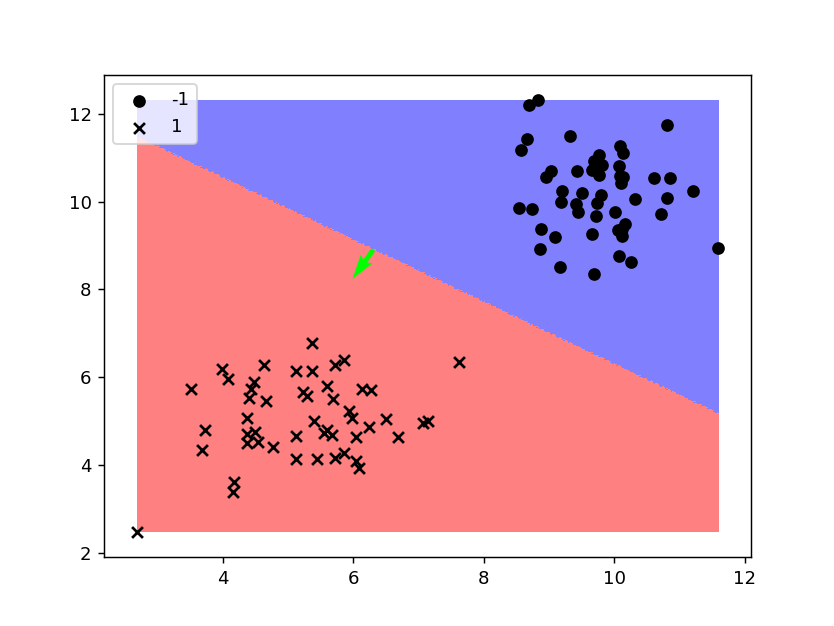

Training error: 0.00 %


In [52]:
%matplotlib notebook
h.visualize_classfier(xTr, yTr, w, b)

# Calculate the training error
err=np.mean(np.sign(xTr.dot(w) + b)!=yTr)
print("Training error: {:.2f} %".format (err*100))

<IPython.core.display.Javascript object>


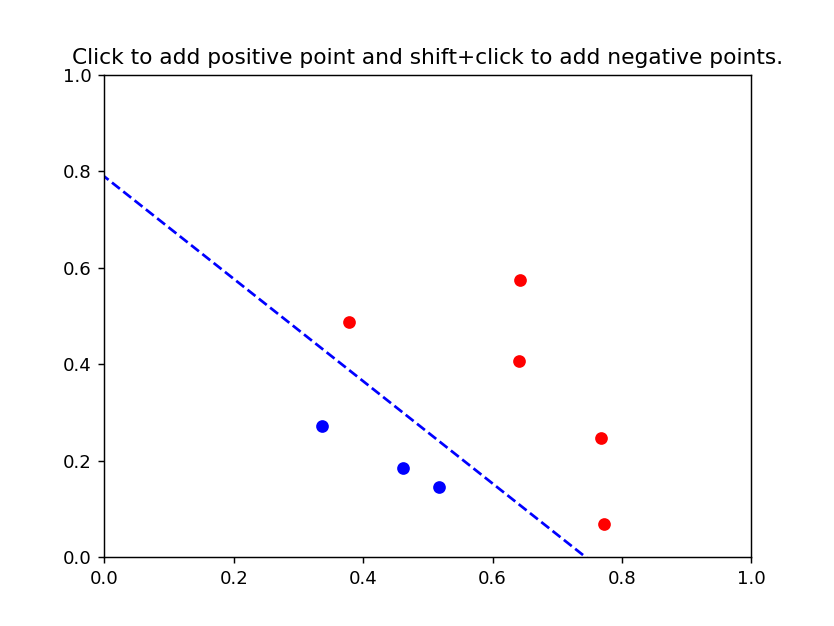

In [53]:
Xdata = []
ldata = []

fig = plt.figure()
details = {
    'w': None,
    'b': None,
    'stepsize': 1,
    'ax': fig.add_subplot(111), 
    'line': None
}

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Click to add positive point and shift+click to add negative points.')

def updateboundary(Xdata, ldata, details):
    w_pre, b_pre, _ = h.minimize(objective=loss, grad=grad, xTr=np.concatenate(Xdata), 
            yTr=np.array(ldata), C=1000)
    details['w'] = np.array(w_pre).reshape(-1)
    details['b'] = b_pre
    details['stepsize'] += 1

def updatescreen(details):
    b = details['b']
    w = details['w']
    q = -b / (w**2).sum() * w
    if details['line'] is None:
        details['line'], = details['ax'].plot([q[0] - w[1],q[0] + w[1]],[q[1] + w[0],q[1] - w[0]],'b--')
    else:
        details['line'].set_ydata([q[1] + w[0],q[1] - w[0]])
        details['line'].set_xdata([q[0] - w[1],q[0] + w[1]])

def generate_animate(Xdata, ldata, details):
    def animate(i):
        if (len(ldata) > 0) and (np.amin(ldata) + np.amax(ldata) == 0):
            if details['stepsize'] < 1000:
                updateboundary(Xdata, ldata, details)
                updatescreen(details)
    return animate

def generate_onclick(Xdata, ldata):    
    def onclick(event):
        if event.key == 'shift': 
            # add positive point
            details['ax'].plot(event.xdata,event.ydata,'or')
            label = 1
        else: # add negative point
            details['ax'].plot(event.xdata,event.ydata,'ob')
            label = -1    
        pos = np.array([[event.xdata, event.ydata]])
        ldata.append(label)
        Xdata.append(pos)
    return onclick


cid = fig.canvas.mpl_connect('button_press_event', generate_onclick(Xdata, ldata))
ani = FuncAnimation(fig, generate_animate(Xdata, ldata, details), np.arange(1,100,1), interval=10)
plt.show()